In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import glob
import nltk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/gasia/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [38]:
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [3]:
word_space_df = pd.read_csv('/home/gasia/StarSpace/words_space.tsv', sep='\t', header=None)

In [4]:
word_space_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,NaN,0.000891,2.306850e-04,-0.002487,0.000365,8.903410e-04,-0.000867,0.000126,-8.548350e-04,0.001290,...,-0.000868,0.001118,-0.002038,-0.001416,-0.001188,0.000272,-1.039700e-03,1.249780e-03,-0.000796,-8.301510e-05
1,__word__price,0.000006,2.973840e-06,0.000004,-0.000031,2.896700e-05,-0.000038,0.000014,4.506230e-07,-0.000032,...,-0.000008,-0.000016,-0.000029,0.000015,-0.000010,-0.000019,-4.357470e-05,2.011180e-05,0.000009,-7.639540e-06
2,__word__go,0.000026,-4.015650e-06,0.000006,-0.000084,-6.160200e-06,0.000005,0.000058,-4.459280e-05,0.000004,...,0.000023,0.000007,-0.000041,-0.000026,0.000058,-0.000013,-1.563940e-05,1.153700e-05,-0.000031,-2.430360e-06
3,__word__people,-0.000029,1.171530e-05,-0.000140,-0.000021,-1.690560e-05,-0.000029,-0.000035,-1.161040e-04,-0.000003,...,0.000027,-0.000037,0.000019,-0.000025,0.000066,0.000021,1.222220e-05,-5.887540e-05,0.000007,3.758550e-05
4,__word__time,0.000044,-4.201780e-05,0.000069,-0.000026,-3.616490e-05,0.000025,-0.000018,-2.569730e-05,-0.000017,...,-0.000020,-0.000019,0.000005,0.000014,0.000015,-0.000032,-3.797110e-05,-1.402450e-05,0.000012,-6.772960e-06
5,__word__rise,-0.000032,-1.503780e-05,-0.000033,-0.000011,7.164010e-05,-0.000066,0.000035,1.904780e-07,-0.000034,...,0.000007,-0.000003,-0.000060,0.000041,0.000021,-0.000062,-8.350000e-05,6.057710e-05,0.000056,-4.780960e-05
6,__word__buy,0.000104,-6.503720e-05,0.000020,-0.000063,-3.680070e-05,-0.000003,0.000063,-9.256760e-05,-0.000058,...,-0.000046,-0.000039,0.000052,-0.000032,-0.000095,-0.000008,-6.154720e-06,-5.206500e-06,0.000013,-1.546800e-05
7,__word__good,-0.000022,-1.697910e-05,0.000031,-0.000017,-5.420950e-06,-0.000010,-0.000028,-6.218520e-05,-0.000002,...,0.000003,0.000041,-0.000017,-0.000033,0.000029,-0.000018,-3.421030e-05,4.295350e-05,-0.000036,1.250570e-07
8,__word__year,0.000040,-4.497130e-05,0.000001,0.000034,9.840050e-05,0.000023,-0.000077,2.076430e-05,-0.000013,...,-0.000104,0.000027,-0.000029,0.000065,0.000015,-0.000033,2.274020e-05,8.231730e-05,0.000019,-1.743520e-06
9,__word__see,-0.000040,3.179700e-07,0.000015,-0.000011,2.281250e-05,-0.000005,-0.000014,-5.124530e-05,0.000012,...,0.000015,0.000055,-0.000024,0.000062,0.000034,-0.000017,4.706920e-06,-5.948090e-05,-0.000021,-5.747050e-05


In [5]:
embedding_matrix = word_space_df.iloc[:,1:].values*100
# np.savetxt('embedding_matrix.txt', embedding_matrix)

In [6]:
b = np.loadtxt('embedding_matrix.txt', dtype=float)
embedding_matrix == b

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
embedding_matrix

array([[ 8.91330e-02,  2.30685e-02, -2.48654e-01, ...,  1.24978e-01,
        -7.95619e-02, -8.30151e-03],
       [ 5.85944e-04,  2.97384e-04,  3.66383e-04, ...,  2.01118e-03,
         8.94584e-04, -7.63954e-04],
       [ 2.64723e-03, -4.01565e-04,  5.92613e-04, ...,  1.15370e-03,
        -3.05743e-03, -2.43036e-04],
       ...,
       [-2.11684e-01, -4.12008e-01, -3.77738e-02, ..., -3.03652e-02,
         3.91285e-02,  4.63328e-01],
       [-8.74419e-02, -5.61707e-02,  2.00460e-01, ..., -1.12580e-01,
         5.69454e-02, -2.82352e-01],
       [-7.97337e-03, -2.21108e-01, -2.37592e-02, ...,  1.54796e-01,
         1.97180e-01,  7.58559e-03]])

In [8]:
len(embedding_matrix)

78991

In [9]:
len(embedding_matrix[0])

50

# Read Data

In [10]:
df = pd.read_csv('final_ready_all_data_word_to_vec.csv', parse_dates = (['timestamp'])).set_index('timestamp')
df.sort_index(inplace = True)

In [11]:
word_to_vec_data = df['word_to_vec_id'].values
price_label = df['price_change'].values

In [12]:
import json
word_to_vec_data = [json.loads(elem) for elem in word_to_vec_data]

In [13]:
price_label = price_label*1000

In [14]:
price_label = [-1 if elem <= -1 else elem for elem in price_label ]
price_label = [1 if elem >= 1 else elem for elem in price_label ]

(array([89868., 11345., 14080., 18875., 32849., 37072., 22085., 16630.,
        13124., 95738.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

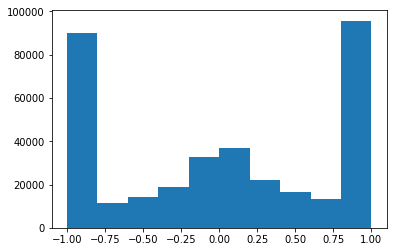

In [15]:
plt.hist(price_label)

# Train/Test

In [92]:
from sklearn.model_selection import train_test_split

In [96]:
emb_len = len( np.loadtxt('embedding_matrix.txt', dtype=float))
padded_docs = pad_sequences(word_to_vec_data, maxlen=150, padding='post', value=emb_len)
print(padded_docs)

[[   11   803    58 ... 78991 78991 78991]
 [28584  3782  1226 ... 78991 78991 78991]
 [ 1252    66   651 ... 78991 78991 78991]
 ...
 [  315  3087     5 ... 78991 78991 78991]
 [  292    12    27 ... 78991 78991 78991]
 [  403    66     1 ... 78991 78991 78991]]


In [145]:
# divide to train test validation sets (80% 10% 10%)
additional_data = df[['polarity', 'subjectivity']].values

X_train, X_test, y_train, y_test, additional_train, additional_test = train_test_split(padded_docs, price_label, additional_data, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val, additional_train, additional_val = train_test_split(X_train, y_train, additional_train, test_size=0.1, random_state=1)

In [146]:
ll = [len(elem) for elem in padded_docs]

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 351666.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

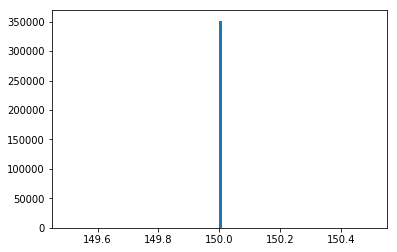

In [147]:
plt.hist(ll, bins = 100)

# Dictionary

In [148]:
word_space_df[0] = [ww[8:] if type(ww) != float else str(ww) for ww in word_space_df[0] ]

In [149]:
words_dict = word_space_df[0].to_dict()

In [150]:
words_dict = dict(zip(words_dict.values(), words_dict.keys()))

In [151]:
# import json 
# with open('word_dict.json', 'w') as outfile:
#     json.dump(words_dict, outfile)

In [152]:
with open('word_dict.json') as json_data:
    words_dict_test = json.load(json_data)

----------

# LSTM

In [153]:
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout, TimeDistributed, Reshape, Lambda
from keras.layers import LSTM

In [154]:
embedding_matrix = np.loadtxt('embedding_matrix.txt', dtype=float)

In [155]:
zero_padding_embedding = (np.zeros(len(embedding_matrix[0]), dtype=float))
embedding_matrix = np.row_stack([embedding_matrix, zero_padding_embedding])

In [156]:
hidden_size = 8 #25
use_dropout=True

-----------

In [157]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model

In [158]:
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
# x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

main_input = Input(shape=(150,), dtype='int32', name='main_input')
x = Embedding(output_dim = len(embedding_matrix[0]), input_dim = len(embedding_matrix),
                    weights=[embedding_matrix], input_length = 150, trainable=False)(main_input)
# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(units = 32)(x)

# model.add(Dense(1, activation='sigmoid'))
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)


In [159]:
# df

In [160]:
auxiliary_input = Input(shape=(2,), name='aux_input')
x = concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='tanh', name='main_output')(x)

In [161]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output])

In [162]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')


In [127]:
# additional_data = df[['polarity', 'subjectivity']].values

In [132]:
len(y_train)

284849

In [133]:
len(np.array(X_train))

284849

In [135]:
len([np.array(X_train), additional_data])

2

In [141]:
len(X_train[0])

150

In [142]:
len(additional_data)

351666

In [ ]:
model.fit([np.array(X_train), additional_train], [np.array(y_train)],
          epochs=10, batch_size=32)

Epoch 1/10
284849/284849 [==============================] - 576s 2ms/step - loss: 0.5842
Epoch 2/10
284849/284849 [==============================] - 495s 2ms/step - loss: 0.5841
Epoch 3/10
 48768/284849 [====>.........................] - ETA: 8:45 - loss: 0.5873

In [ ]:
0.58^2  0.2

In [20]:
# model = Sequential()
# model.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]), 
#                     weights=[embedding_matrix], input_length= 1, trainable=False))

# model.add(LSTM(hidden_size, return_sequences=True))
# model.add(LSTM(hidden_size, return_sequences=True))
# if use_dropout:
#     model.add(Dropout(0.2))

# model.add(Dense(8))
# model.add(Dense(4))
# model.add(Dense(1))

In [21]:
# optimizer = Adam()
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [22]:
# embedding_matrix = np.loadtxt('embedding_matrix.txt', dtype=float)
# # hidden_size = 500
# hidden_size = 8 #25
# use_dropout=True

# #model.add(Embedding(vocabulary, hidden_size, input_length=num_steps))

# model = Sequential()
# model.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]), weights=[embedding_matrix], input_length= 1, trainable=False))

# model.add(LSTM(hidden_size, return_sequences=True))
# model.add(LSTM(hidden_size, return_sequences=True))
# if use_dropout:
#     model.add(Dropout(0.2))

# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [23]:
# model.fit(x_train, y_train, batch_size=16, epochs=10)
# score = model.evaluate(x_test, y_test, batch_size=16)

one epoch = one forward pass and one backward pass of all the training examples
batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [42]:
embedding_matrix = np.loadtxt('embedding_matrix.txt', dtype=float)
# hidden_size = 500
hidden_size =  len(embedding_matrix[0]) #25
use_dropout=True

#model.add(Embedding(vocabulary, hidden_size, input_length=num_steps))

model = Sequential()
model.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]),
                    weights=[embedding_matrix], input_length = 150, trainable=False))
# model.add(Flatten())

#model.add(LSTM(50, return_sequences=True, input_shape=(150, 50)))
model.add(LSTM(hidden_size, return_sequences=False))

print(model.summary())
if use_dropout:
    model.add(Dropout(0.2))

#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 150, 50)           3949550   
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
Total params: 3,969,750
Trainable params: 20,200
Non-trainable params: 3,949,550
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 150, 50)           3949550   
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
________________________________________________________

In [ ]:
embedding_matrix = np.loadtxt('embedding_matrix.txt', dtype=float)
# hidden_size = 500
hidden_size =  len(embedding_matrix[0]) #25
use_dropout=True

#model.add(Embedding(vocabulary, hidden_size, input_length=num_steps))

def part(x):
    x0 = x[:3]
    x1 = x[3:]
    model_2 = Sequential()
    model_2.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]),
                    weights=[embedding_matrix], input_length = 150, trainable=False))
    

    #model.add(LSTM(50, return_sequences=True, input_shape=(150, 50)))
    model_2.add(LSTM(hidden_size, return_sequences=False))
    
model = Sequential()
model.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]),
                    weights=[embedding_matrix], input_length = 150, trainable=False))
# model.add(Flatten())

#model.add(LSTM(50, return_sequences=True, input_shape=(150, 50)))
model.add(LSTM(hidden_size, return_sequences=False))

print(model.summary())
if use_dropout:
    model.add(Dropout(0.2))

#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
print(model.summary())

In [43]:
padded_docs = pad_sequences(train_data, maxlen=150, padding='post')
print(padded_docs)

[[ 116 1119  603 ...    0    0    0]
 [   1  157 1608 ...    0    0    0]
 [ 274  185   30 ...    0    0    0]
 ...
 [  35 1318  513 ...    0    0    0]
 [ 124  407   81 ...    0    0    0]
 [  97   40   41 ...    0    0    0]]


In [ ]:
model.fit(np.array(padded_docs), np.array(y_train), epochs=100, verbose=0)

In [5]:
loss, accuracy = model.evaluate(padded_docs, np.array(y_train), verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 53.826800


-----------

# Keras

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [117]:
def file_to_word_ids(data, word_to_id):
    return [word_to_id[word] for word in data if word in word_to_id]

In [ ]:
vocabulary = len(words_dict)

In [66]:
def generate(self):
    x = np.zeros((self.batch_size, self.num_steps))
    y = np.zeros((self.batch_size, self.num_steps, self.vocabulary))
    while True:
        for i in range(self.batch_size):
            if self.current_idx + self.num_steps >= len(self.data):
                # reset the index back to the start of the data set
                self.current_idx = 0
            x[i, :] = self.data[self.current_idx:self.current_idx + self.num_steps]
            temp_y = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1]
            # convert all of temp_y into a one hot representation
            y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
            self.current_idx += self.skip_step
        yield x, y

In [ ]:
num_steps = 1
batch_size = len(data)

In [ ]:
KerasBatchGenerator

In [ ]:
hidden_size = 500
num_steps = 50
use_dropout=True

model = Sequential()
model.add(Embedding(vocabulary, hidden_size, input_length=num_steps))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model.summary())

In [ ]:
model = Sequential()
#output sze 32
model.add(Dense(32, activation='relu', input_dim=50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_vecs_w2v, y_train, epochs=9, batch_size=32, verbose=2)

In [50]:
embed_dim = 50
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(len(word_space_df), embed_dim,input_length = len(X_train), dropout = 0.2))
model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 452820, 50)        3949550   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               200800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 4,150,752
Trainable params: 4,150,752
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
len(word_space_df)

78991

In [47]:
X_train.shape[1]

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
def load_data():
    # get the data paths
    train_path = os.path.join(data_path, "ptb.train.txt")
    valid_path = os.path.join(data_path, "ptb.valid.txt")
    test_path = os.path.join(data_path, "ptb.test.txt")

    # build the complete vocabulary, then convert text data to list of integers
    word_to_id = build_vocab(train_path)
    train_data = file_to_word_ids(train_path, word_to_id)
    valid_data = file_to_word_ids(valid_path, word_to_id)
    test_data = file_to_word_ids(test_path, word_to_id)
    vocabulary = len(word_to_id)
    reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    print(train_data[:5])
    print(word_to_id)
    print(vocabulary)
    print(" ".join([reversed_dictionary[x] for x in train_data[:10]]))
    return train_data, valid_data, test_data, vocabulary, reversed_dictionary

In [36]:
class KerasBatchGenerator(object):

    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=5):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set
        self.skip_step = skip_step

In [26]:
def file_to_word_ids(data, word_to_id):
    return [word_to_id[word] for word in data if word in word_to_id]


def load_data():

    # build the complete vocabulary, then convert text data to list of integers
    #word_to_id = build_vocab(train_path)
    with open('word_dict.json') as json_data:
        word_to_id = json.load(json_data)

    #train_data = file_to_word_ids(train_path, word_to_id)
    with open('texts_clean.json') as json_data:
        all_forum_data = json.load(json_data)
    
#     all_forum_data =all_forum_data[:20]
    ###WARNINGS change to price
    random_y = [random.uniform(-1, 1) for i in range(len(all_forum_data))]
    price_data = random_y

    # divide to train test validation sets (80% 10% 10%)
    X_train, X_test, y_train, y_test = train_test_split(all_forum_data, price_data, test_size=0.1, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    train_data = [file_to_word_ids(elem, word_to_id) for elem in X_train]
    valid_data = [file_to_word_ids(elem, word_to_id) for elem in X_val  ]
    test_data  = [file_to_word_ids(elem, word_to_id) for elem in X_test ]

    #valid_data = file_to_word_ids(valid_path, word_to_id)
    #test_data = file_to_word_ids(test_path, word_to_id)

    vocabulary = len(word_to_id)
    reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    # back to word representation
    print(" ".join([reversed_dictionary[x] for x in train_data[5]]))
    return train_data, valid_data, test_data, vocabulary, reversed_dictionary, y_train, y_test, y_val

train_data, valid_data, test_data, vocabulary, reversed_dictionary, y_train, y_test, y_val = load_data()

simple arithmetic
